In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


- kc_house_data.csv - Dataset link: https://www.kaggle.com/shivachandel/kc-house-data
- default of credit card clients.csv - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Checks for data sets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
#import io

In [9]:
from google.colab import files
uploaded = files.upload()



Saving default of credit card clients.csv to default of credit card clients.csv
Saving kc_house_data.csv to kc_house_data.csv


In [10]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "default of credit card clients.csv" with length 3332573 bytes
User uploaded file "kc_house_data.csv" with length 2445755 bytes


In [3]:
cc = pd.read_csv('default of credit card clients.csv')
kc = pd.read_csv('kc_house_data.csv')

In [0]:
cc = pd.read_csv(io.StringIO(uploaded['default of credit card clients.csv'].decode('utf-8')))
kc = pd.read_csv(io.StringIO(uploaded['kc_house_data.csv'].decode('utf-8')))

- At least 15 features (columns)
- At least 1000 instances (rows)

In [4]:
print("kc_house_data.csv",kc.shape)
print("default of credit card clients.csv",cc.shape)

kc_house_data.csv (21613, 21)
default of credit card clients.csv (30000, 25)


- At least two categorical/ordinal columns.


In [5]:
kc.info() #waterfront #view #condition - categorical # grade - ordinal 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            20308 non-null float64
bedrooms         21613 non-null int64
bathrooms        19386 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           20303 non-null float64
waterfront       20338 non-null object
view             21613 non-null int64
condition        21613 non-null object
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              19511 non-null float64
long             19458 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13), object(3)
memory usage: 3.5+ MB


In [6]:
cc.info() #EDUCATION - ordinal #MARRIAGE - Categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      26394 non-null object
AGE                           27594 non-null float64
PAY_REC_SEP                   30000 non-null int64
PAY_REC_AUG                   30000 non-null int64
PAY_REC_JUL                   27606 non-null float64
PAY_REC_JUN                   30000 non-null int64
PAY_REC_MAY                   30000 non-null int64
PAY_REC_APR                   30000 non-null int64
BILL_AMT_SEP                  30000 non-null int64
BILL_AMT_AUG                  30000 non-null int64
BILL_AMT_JUL                  30000 non-null int64
BILL_AMT_JUN                  30000 non-null int64
BILL_AMT_MAY                  26358 non-null float64
BILL_AMT_APR   

- Between 5 to 10 percent missing values across the dataset. 

In [7]:
kc.isna().sum()/len(kc)*100

id                0.000000
date              0.000000
price             6.038033
bedrooms          0.000000
bathrooms        10.303984
sqft_living       0.000000
sqft_lot          0.000000
floors            6.061167
waterfront        5.899227
view              0.000000
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated      0.000000
zipcode           0.000000
lat               9.725628
long              9.970851
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [8]:
cc.isna().sum()/len(cc)*100

ID                             0.00
LIMIT_BAL                      0.00
SEX                            0.00
EDUCATION                      0.00
MARRIAGE                      12.02
AGE                            8.02
PAY_REC_SEP                    0.00
PAY_REC_AUG                    0.00
PAY_REC_JUL                    7.98
PAY_REC_JUN                    0.00
PAY_REC_MAY                    0.00
PAY_REC_APR                    0.00
BILL_AMT_SEP                   0.00
BILL_AMT_AUG                   0.00
BILL_AMT_JUL                   0.00
BILL_AMT_JUN                   0.00
BILL_AMT_MAY                  12.14
BILL_AMT_APR                   0.00
PAID_AMT_SEP                  11.84
PAID_AMT_AUG                   0.00
PAID_AMT_JUL                   0.00
PAID_AMT_JUN                   0.00
PAID_AMT_MAY                   0.00
PAID_AMT_APR                   0.00
default payment next month     0.00
dtype: float64

## Preprocessing of data

- NA imputations

In [9]:
# removing columns where Marriage is NA
cc = cc.dropna(subset=['MARRIAGE'])

# replacing NA with average age value in the data set
cc['AGE'] = cc['AGE'].fillna(float("{0:.0f}".format(cc['AGE'].mean())))

# putting zero in place of NA for PAY_REC_JUL & BILL_AMT_MAY because we can assume the payment was zero 
#  rather than removing the rows for these values
cc = cc.fillna(0)

In [10]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26394 entries, 0 to 29997
Data columns (total 25 columns):
ID                            26394 non-null int64
LIMIT_BAL                     26394 non-null int64
SEX                           26394 non-null object
EDUCATION                     26394 non-null object
MARRIAGE                      26394 non-null object
AGE                           26394 non-null float64
PAY_REC_SEP                   26394 non-null int64
PAY_REC_AUG                   26394 non-null int64
PAY_REC_JUL                   26394 non-null float64
PAY_REC_JUN                   26394 non-null int64
PAY_REC_MAY                   26394 non-null int64
PAY_REC_APR                   26394 non-null int64
BILL_AMT_SEP                  26394 non-null int64
BILL_AMT_AUG                  26394 non-null int64
BILL_AMT_JUL                  26394 non-null int64
BILL_AMT_JUN                  26394 non-null int64
BILL_AMT_MAY                  26394 non-null float64
BILL_AMT_APR   

In [11]:
np.random.seed(123)
cc = cc.sample(frac=0.04)

In [12]:
print('label 0:', len(cc[cc['default payment next month'] == 0]))
print('label 1:', len(cc[cc['default payment next month'] == 1]))

label 0: 826
label 1: 230


- Removing insignificant columns

In [13]:
cc = cc.drop(["ID"],axis=1)

In [14]:
cc["EDUCATION"] = cc["EDUCATION"].map( {'others' : 0, ' high_school' : 1, 'university' : 2, 'graduate_school' : 3} ).astype(int)

- Looking at below unique values one hot vector seems the right choice but the marriage with value as 'others' is very less (~1.2%) and doesnot make any intuition hence dropping rows with value as 'others'

In [15]:
print(cc["MARRIAGE"].unique())
print("Others",len(cc[cc['MARRIAGE'] == 'others']))
cc = cc[cc.MARRIAGE != "others"]
print(cc["MARRIAGE"].unique())
cc["MARRIAGE"] = cc["MARRIAGE"].map( {'single' : 0, 'married' : 1} ).astype(int)
cc["SEX"] = cc["SEX"].map( {'M' : 0, 'F' : 1} ).astype(int)

['single' 'married' 'others']
Others 8
['single' 'married']


In [16]:
cc.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_REC_SEP,PAY_REC_AUG,PAY_REC_JUL,PAY_REC_JUN,PAY_REC_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAID_AMT_SEP,PAID_AMT_AUG,PAID_AMT_JUL,PAID_AMT_JUN,PAID_AMT_MAY,PAID_AMT_APR,default payment next month
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,...,1048.000000,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,171135.496183,0.576336,2.192748,0.459924,35.824427,-0.007634,-0.114504,-0.123092,-0.212786,-0.271947,...,45530.675573,37019.989504,41633.879771,5284.573473,6.838764e+03,4990.643130,4802.603053,6145.501908,6559.251908,0.217557
std,131187.904343,0.494374,0.742402,0.498629,8.675609,1.208035,1.253937,1.234308,1.213404,1.158621,...,67004.948065,59248.106906,63932.062635,15885.490600,3.681109e+04,14959.529113,13830.647126,21064.194963,20520.445728,0.412782
min,10000.000000,0.000000,0.000000,0.000000,22.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-4894.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70000.000000,0.000000,2.000000,0.000000,29.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2400.000000,324.250000,1448.250000,0.000000,1.000000e+03,390.000000,262.250000,316.000000,204.250000,0.000000
50%,140000.000000,1.000000,2.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18724.500000,12430.000000,17259.500000,1871.000000,2.070500e+03,1900.000000,1600.000000,1700.000000,1793.500000,0.000000
75%,240000.000000,1.000000,3.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59325.750000,46971.750000,53029.000000,4966.000000,5.000000e+03,4458.250000,4500.000000,4522.500000,4500.000000,0.000000
max,740000.000000,1.000000,3.000000,1.000000,74.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,541019.000000,489200.000000,527566.000000,201153.000000,1.024516e+06,288921.000000,211250.000000,331788.000000,261883.000000,1.000000


## Data Exploration

In [17]:
cc.shape

(1048, 24)

In [18]:
import seaborn as sns

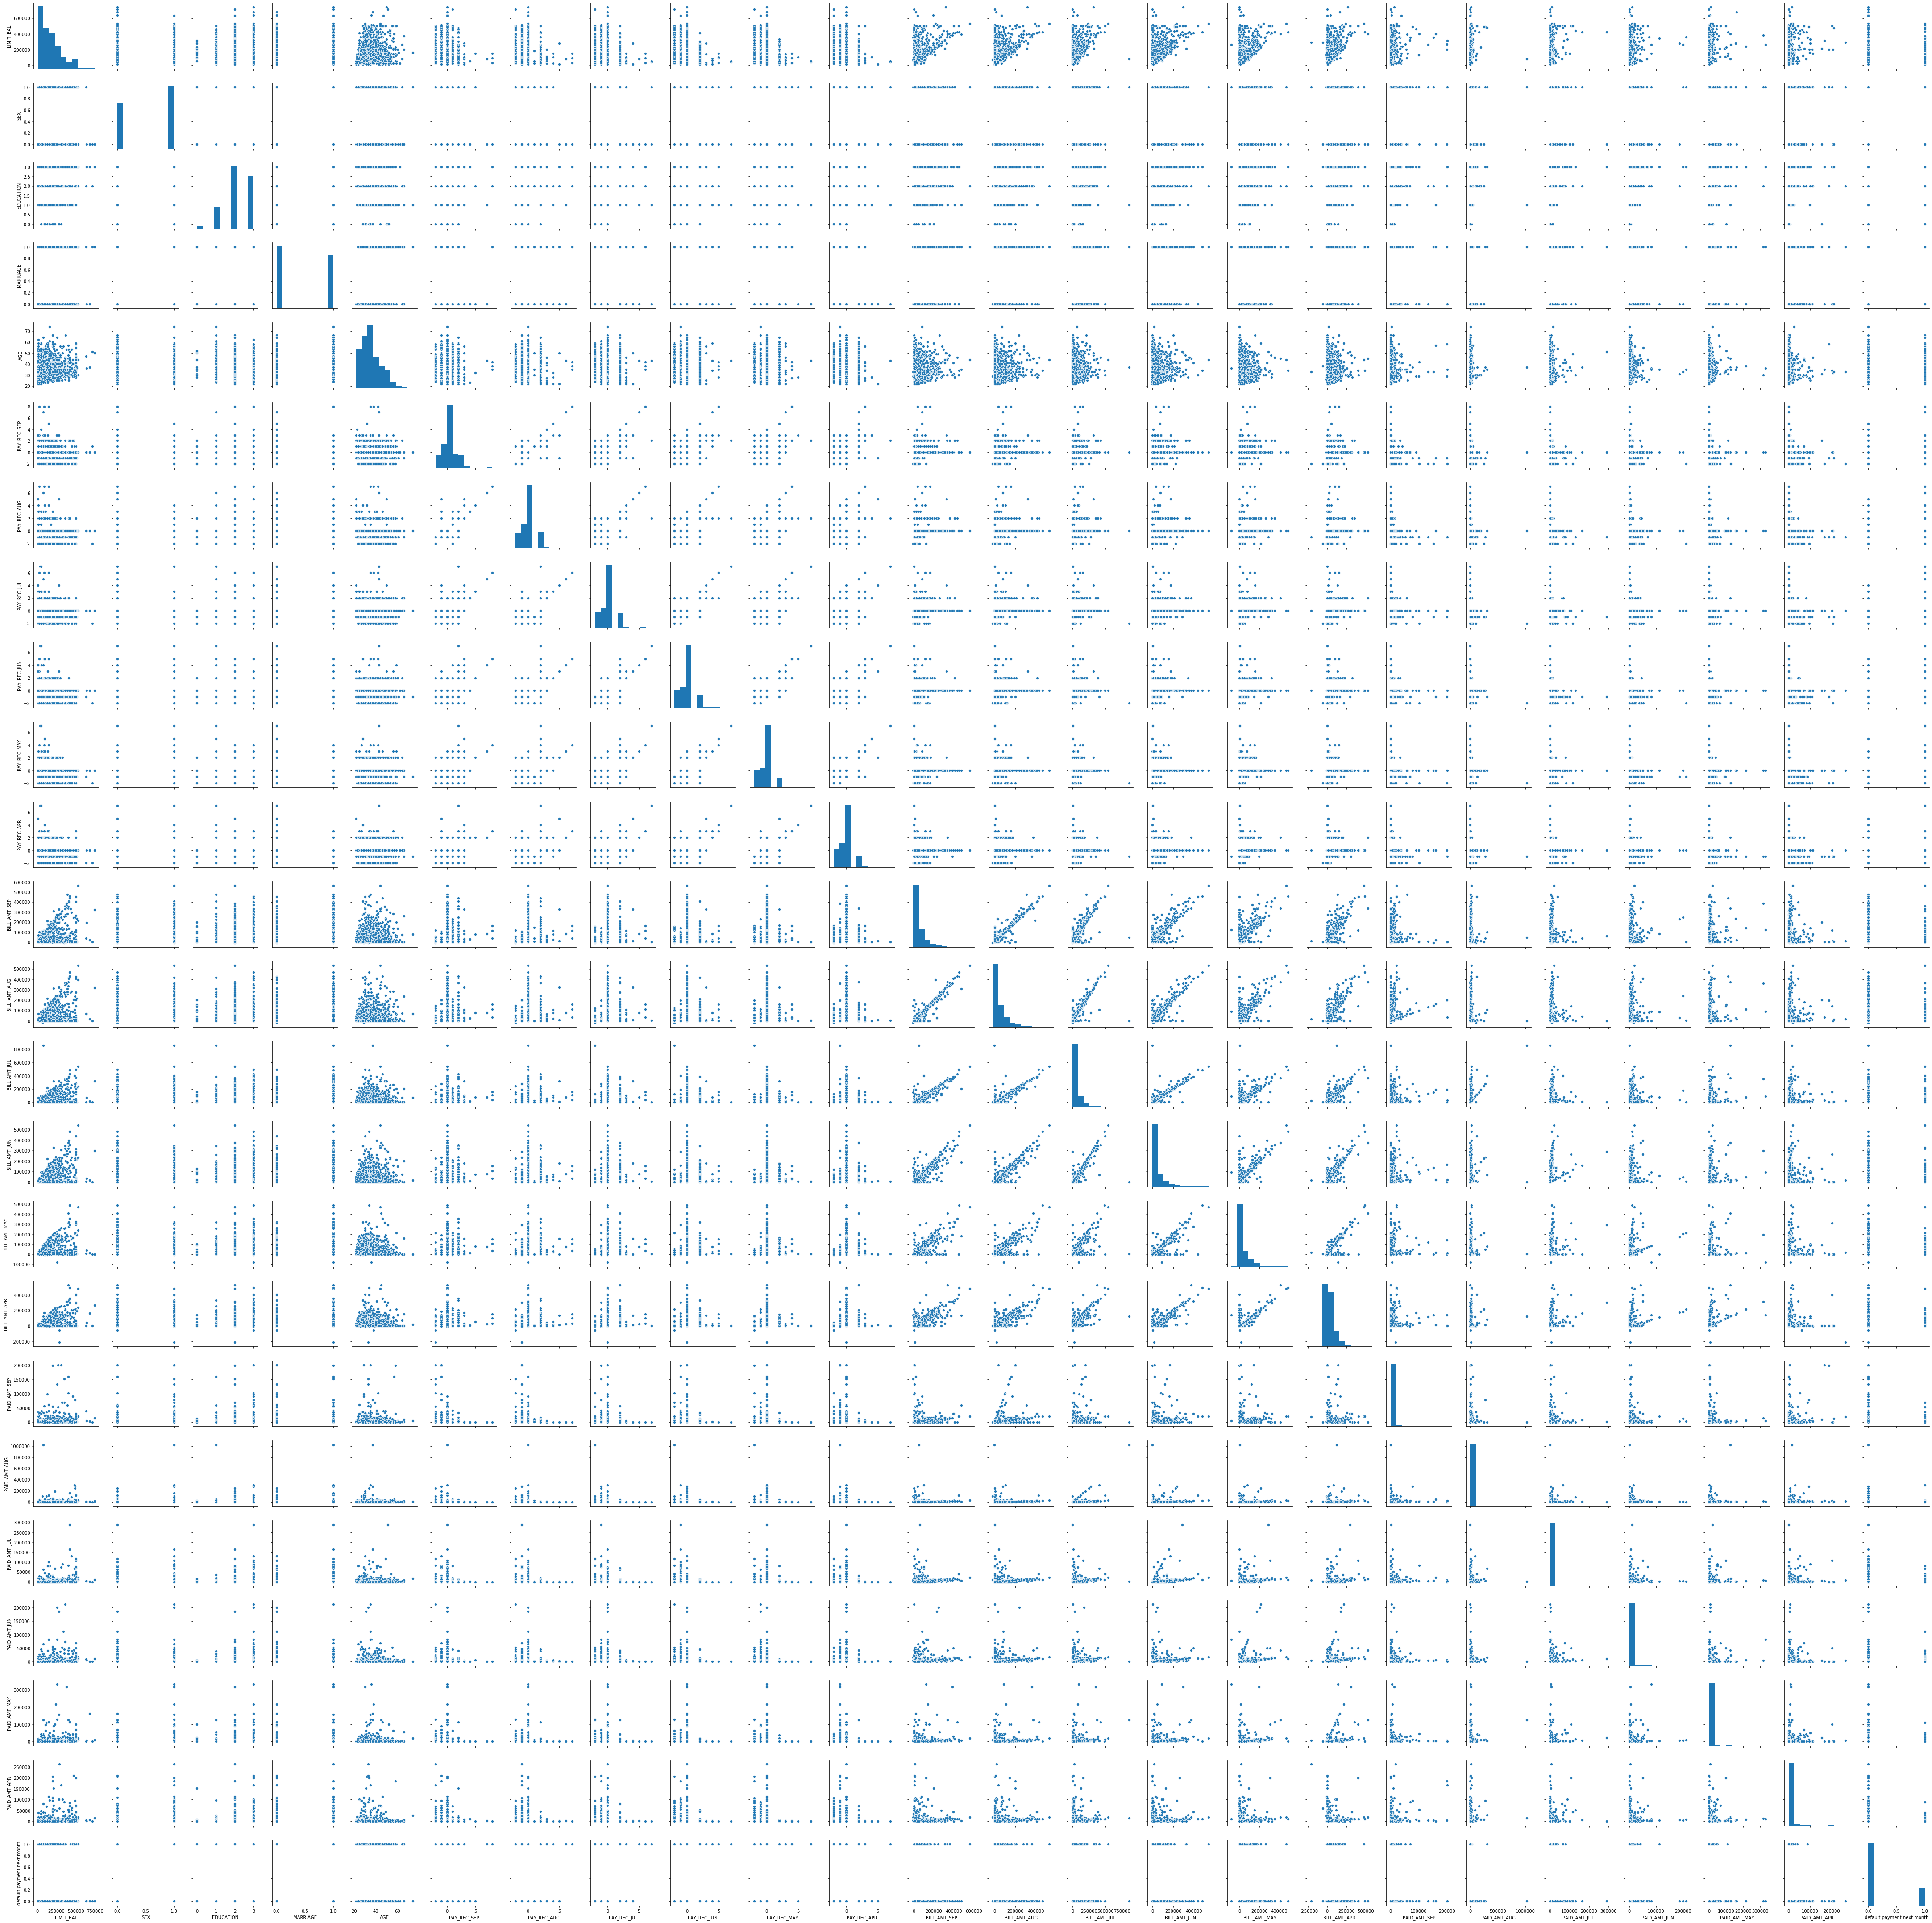

In [21]:
import seaborn as sns
sns.pairplot(cc)

In [19]:
rs = np.random.RandomState(0)
df = pd.DataFrame(cc)
corr = df.corr()
corr.style.background_gradient(cmap='summer')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_REC_SEP,PAY_REC_AUG,PAY_REC_JUL,PAY_REC_JUN,PAY_REC_MAY,PAY_REC_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAID_AMT_SEP,PAID_AMT_AUG,PAID_AMT_JUL,PAID_AMT_JUN,PAID_AMT_MAY,PAID_AMT_APR,default payment next month
LIMIT_BAL,1,0.0140516,0.201435,0.133054,0.128647,-0.238121,-0.264896,-0.263621,-0.267283,-0.229836,-0.213019,0.274974,0.275343,0.27161,0.305182,0.261531,0.311173,0.188033,0.10289,0.253456,0.203313,0.188614,0.212759,-0.187468
SEX,0.0140516,1,-0.00369488,0.0317948,-0.107103,-0.0933794,-0.0829515,-0.0980649,-0.0724077,-0.0379252,-0.0365298,-0.0460905,-0.0343378,-0.0157635,-0.0156653,-0.0010423,-0.00571634,0.0104323,0.0120948,-0.00438972,-0.0055164,0.0297268,0.0356785,-0.0440166
EDUCATION,0.201435,-0.00369488,1,-0.193261,-0.213766,-0.124024,-0.104517,-0.120005,-0.125128,-0.106671,-0.0757755,-0.0215017,-0.0134764,-0.0182921,0.00697597,0.0174571,0.0309689,0.0420714,-0.00258355,0.0816258,0.086539,0.0463169,0.0700775,-0.0372338
MARRIAGE,0.133054,0.0317948,-0.193261,1,0.43774,-0.0116076,-0.0333149,-0.0227655,-0.0590978,-0.0395482,-0.0391329,0.0365006,0.031833,0.044706,0.0372499,0.0195953,0.0343594,0.00708631,0.0270476,0.0522729,-0.00283092,0.0362725,-0.017854,0.0145588
AGE,0.128647,-0.107103,-0.213766,0.43774,1,0.00661581,-0.0132633,0.0089506,-0.00273573,-0.000763781,-0.00779956,0.0467594,0.054639,0.0422883,0.0387195,0.00273565,0.0248723,0.0373883,-0.00476562,0.0397429,-0.00857564,0.0216342,-0.0144599,0.0666847
PAY_REC_SEP,-0.238121,-0.0933794,-0.124024,-0.0116076,0.00661581,1,0.72641,0.614293,0.602906,0.546474,0.518165,0.218489,0.206,0.175775,0.183282,0.188947,0.171231,-0.128448,-0.0524775,-0.0715394,-0.0785568,-0.0383959,-0.0941866,0.355762
PAY_REC_AUG,-0.264896,-0.0829515,-0.104517,-0.0333149,-0.0132633,0.72641,1,0.76164,0.724692,0.635956,0.609215,0.26059,0.253435,0.227881,0.226954,0.223034,0.208199,-0.0898541,-0.0357624,-0.0707159,-0.0497637,-0.0252933,-0.0744447,0.258533
PAY_REC_JUL,-0.263621,-0.0980649,-0.120005,-0.0227655,0.0089506,0.614293,0.76164,1,0.815985,0.703875,0.639321,0.213393,0.240073,0.199815,0.222496,0.22816,0.205478,-0.00765449,-0.0782566,-0.0552919,-0.025942,-0.0283128,-0.0761725,0.285061
PAY_REC_JUN,-0.267283,-0.0724077,-0.125128,-0.0590978,-0.00273573,0.602906,0.724692,0.815985,1,0.820242,0.715,0.211697,0.229171,0.213156,0.23691,0.227372,0.216692,-0.0157507,-0.0453982,-0.0855893,-0.0526468,-0.0266531,-0.0576298,0.300366
PAY_REC_MAY,-0.229836,-0.0379252,-0.106671,-0.0395482,-0.000763781,0.546474,0.635956,0.703875,0.820242,1,0.830685,0.203167,0.221916,0.209259,0.253255,0.242107,0.233697,-0.0104289,-0.0350263,0.0250757,-0.0550162,-0.0165573,-0.0712418,0.26362


(array([0, 1]), <a list of 2 Text xticklabel objects>)

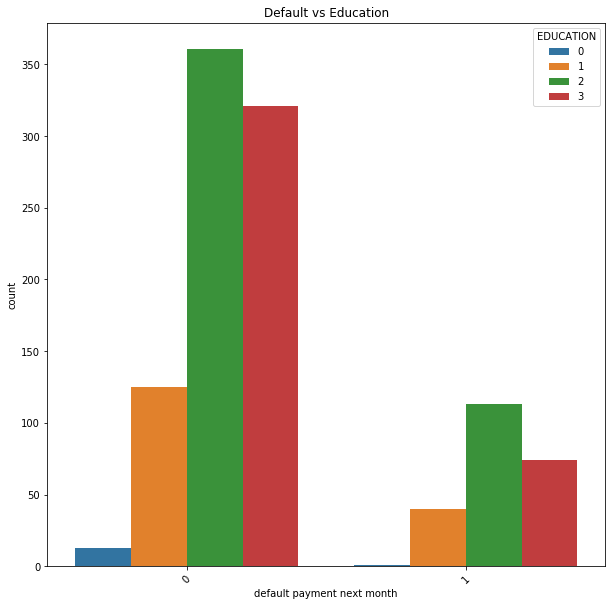

In [20]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='default payment next month',data=cc[['default payment next month','EDUCATION']],
              hue="EDUCATION").set_title("Default vs Education")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

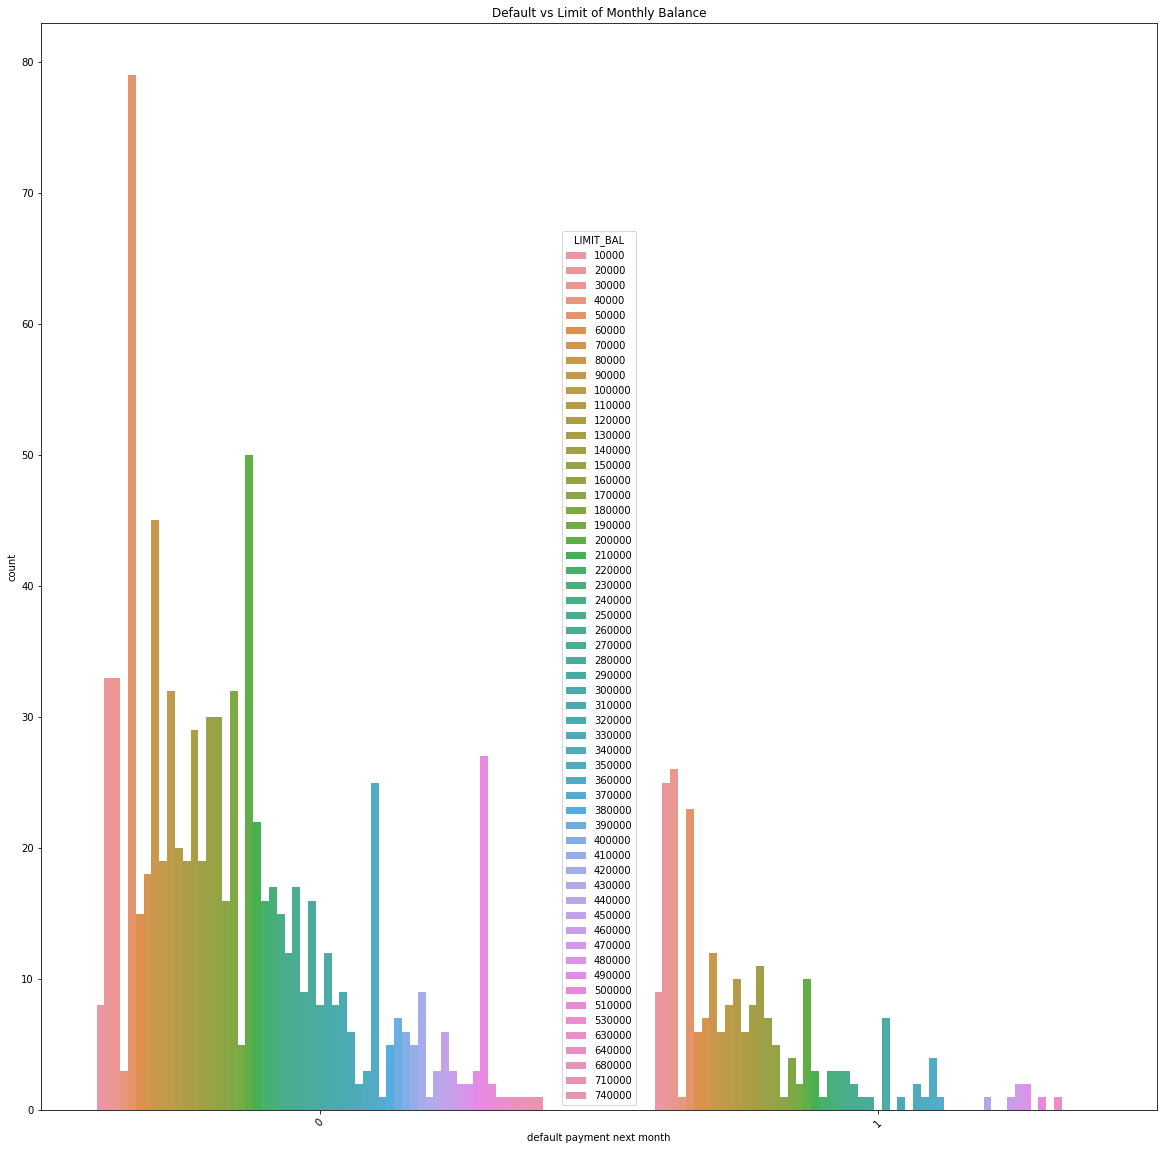

In [21]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='default payment next month',data=cc[['default payment next month','LIMIT_BAL']],
              hue="LIMIT_BAL").set_title("Default vs Limit of Monthly Balance")
plt.xticks(rotation=45)

## Scaling

In [22]:
y=cc['default payment next month']
X = cc.drop(['default payment next month'], axis=1)

In [23]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


C:\Users\heta2\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_REC_SEP,PAY_REC_AUG,PAY_REC_JUL,PAY_REC_JUN,PAY_REC_MAY,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAID_AMT_SEP,PAID_AMT_AUG,PAID_AMT_JUL,PAID_AMT_JUN,PAID_AMT_MAY,PAID_AMT_APR
866,180000,1,2,0,35.0,0,0,0.0,-2,-2,...,0,0,0.0,0,6000.0,0,0,0,0,0
9597,180000,1,2,1,41.0,0,0,0.0,0,0,...,122164,111328,113890.0,116823,6411.0,6000,5000,4500,5000,4200
19810,260000,1,3,0,36.0,-1,-1,-1.0,0,0,...,15362,21068,27669.0,32202,0.0,15362,10000,7000,5000,5000
1649,50000,0,3,1,40.0,0,0,0.0,0,0,...,9715,8965,6652.0,7385,2200.0,2000,1000,500,1000,400
8987,150000,1,3,0,35.0,0,0,2.0,2,0,...,137525,133431,135837.0,143319,12644.0,4926,0,5122,10349,0
7943,30000,1,2,1,45.0,0,0,0.0,0,0,...,13511,13781,14070.0,14350,1676.0,1223,493,511,514,532
10533,10000,1,1,1,52.0,2,2,2.0,2,2,...,4148,4579,4360.0,4787,1100.0,0,500,0,500,0
15517,50000,0,1,1,41.0,2,2,2.0,2,-2,...,13555,0,0.0,0,2700.0,103,0,0,0,0
610,220000,0,3,0,43.0,0,0,-1.0,-1,-1,...,19292,18900,13580.0,33150,1006.0,32906,18900,13580,33150,0
20922,360000,0,2,1,46.0,-2,-2,-2.0,-2,-2,...,1935,1205,1320.0,1068,3108.0,1952,1219,1326,1073,191


## Models run in this file: 
- 2 Voting Classifiers: Hard Voting, Soft Voting,
- 2 Bagging models: Logistic Regression, K-NN, 
- 2 Pasting models: SVC Linear Kernel, Kernel RBF,
- 2 AdaBoosting Classifiers: Linear SVC, SVC Kernel Poly,
- 1 Gradient Boosting model: Decision tree,
- PCA: K-NN, Logistic Regression, Linear SVC, SVC Linear Kernel, SVC Kernel rbf, SVC Kernel Poly, Decision Tree, 
- Deep Neural Network

## Soft Voting

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 589   size of validation set: 197   size of test set: 262



In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
log_clf = LogisticRegression(penalty = 'l1', C = 1)
log_clf.fit(X_trainval, y_trainval)
knn_clf = KNeighborsClassifier(3)
knn_clf.fit(X_trainval, y_trainval)


voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='soft') # list of all based models in the form a tuple
voting_clf.fit(X_trainval, y_trainval) # to find majority voting


from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
    
from sklearn.metrics import precision_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, precision_score(y_test, y_pred))
    
    
    
from sklearn.metrics import recall_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))

LogisticRegression 0.8320610687022901
KNeighborsClassifier 0.7633587786259542
VotingClassifier 0.816793893129771
LogisticRegression 0.782608695652174
KNeighborsClassifier 0.42857142857142855
VotingClassifier 0.8
LogisticRegression 0.3157894736842105
KNeighborsClassifier 0.2631578947368421
VotingClassifier 0.21052631578947367


In [0]:
log_reg = LogisticRegression(penalty = 'l1', C = 1)
log_reg.fit(X_trainval, y_trainval)

print(log_reg.score(X_trainval, y_trainval))
print(log_reg.score(X_test, y_test))


logreg_tr_pred = log_reg.predict(X_trainval)
logreg_test_pred = log_reg.predict(X_test)

0.8282442748091603
0.8320610687022901


## Hard Voting

In [0]:
svc_clf = SVC(C=1.0, gamma='auto')
log_clf.fit(X_trainval, y_trainval)
knn_clf = KNeighborsClassifier(3)
knn_clf.fit(X_trainval, y_trainval)


voting_clf = VotingClassifier(estimators=[('svc', svc_clf), ('knn', knn_clf)], voting='hard') # list of all based models in the form a tuple
voting_clf.fit(X_trainval, y_trainval) # to find majority voting


from sklearn.metrics import accuracy_score
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
    
from sklearn.metrics import precision_score
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, precision_score(y_test, y_pred))
    
    
    
from sklearn.metrics import recall_score
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))

SVC 0.7824427480916031
KNeighborsClassifier 0.7633587786259542
VotingClassifier 0.7824427480916031
SVC 0.0
KNeighborsClassifier 0.42857142857142855
VotingClassifier 0.0
SVC 0.0
KNeighborsClassifier 0.2631578947368421
VotingClassifier 0.0


## BAGGING - LOGISTIC REGRESSION

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV


log_reg = LogisticRegression(penalty = 'l1', C = 1)
n_estimators_vals = [10,20]
max_samples_vals = [100,150]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

log_bag = BaggingClassifier(log_reg,bootstrap = True, random_state=0)

grid_search = GridSearchCV(log_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=5, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
#print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 150, 'n_estimators': 20}
Best cross-validation score: 0.83


In [0]:
log_reg = LogisticRegression(penalty = 'l1', C = 1)
bag_clf = BaggingClassifier(log_reg, n_estimators=20, max_samples=150, bootstrap=True, random_state=0)

bag_clf.fit(X_trainval, y_trainval)
y_pred = bag_clf.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
print(accuracy_score(y_test, y_pred))


print(precision_score(y_test, y_pred))


print(recall_score(y_test, y_pred))

0.8129770992366412
0.6428571428571429
0.3157894736842105


In [0]:
bag_clf.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(bag_clf.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.84
Test score: 0.81


In [0]:
log_reg = LogisticRegression(penalty = 'l1', C = 1)
log_reg.fit(X_trainval, y_trainval)
y_pred_tree = log_reg.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

print(precision_score(y_test, y_pred_tree))

print(recall_score(y_test, y_pred_tree))

0.8320610687022901
0.782608695652174
0.3157894736842105


In [0]:
pd.crosstab(y_trainval, logreg_tr_pred)

col_0,0,1
default payment next month,,
0,593,22
1,113,58


In [0]:
print(log_reg.score(X_trainval, y_trainval))

0.8282442748091603


In [0]:
pd.crosstab(y_test, logreg_test_pred)

col_0,0,1
default payment next month,,
0,200,5
1,39,18


In [0]:
print(log_reg.score(X_test, y_test))

0.8320610687022901


In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_test, logreg_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       205
           1       0.78      0.32      0.45        57

    accuracy                           0.83       262
   macro avg       0.81      0.65      0.68       262
weighted avg       0.83      0.83      0.80       262



AUC: 0.740
[1.99284227e+00 9.92842271e-01 9.81170941e-01 8.84390569e-01
 6.23387659e-01 6.12908973e-01 6.05564785e-01 5.94856630e-01
 5.35075774e-01 5.23840917e-01 5.04348906e-01 4.39679627e-01
 3.88641468e-01 3.62939318e-01 3.42491365e-01 3.27038091e-01
 3.25244387e-01 3.12466695e-01 3.09721338e-01 2.82152554e-01
 2.70724345e-01 2.62583870e-01 2.62482831e-01 2.40336221e-01
 2.40097560e-01 2.38350913e-01 2.38122420e-01 2.37771366e-01
 2.33561996e-01 2.20299299e-01 2.19930430e-01 1.90285337e-01
 1.87430267e-01 1.79427906e-01 1.77970246e-01 1.59620040e-01
 1.57561030e-01 1.50443527e-01 1.50022056e-01 1.49510913e-01
 1.49154179e-01 1.43989112e-01 1.39648601e-01 1.38805084e-01
 1.38306550e-01 1.29577312e-01 1.28900016e-01 1.25705379e-01
 1.25121517e-01 1.19571214e-01 1.18958979e-01 1.07186519e-01
 1.04818811e-01 1.03410487e-01 1.03329658e-01 9.90391591e-02
 9.64598667e-02 8.94031980e-02 8.93428420e-02 8.14824435e-02
 8.05323657e-02 7.52328596e-02 7.50458414e-02 5.32431977e-02
 5.24015855e-

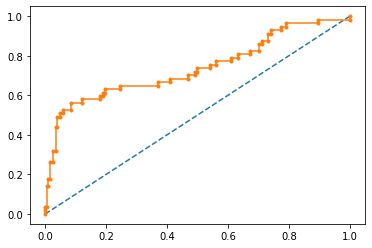

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## BAGGING K-NN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []


knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
train_score_array.append(knn.score(X_trainval, y_trainval))
test_score_array.append(knn.score(X_test, y_test))

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV


knn_clf = KNeighborsClassifier(3)
n_estimators_vals = [10,20]
max_samples_vals = [10, 20]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

knn_bag = BaggingClassifier(knn_clf,bootstrap = True, random_state=0)

grid_search = GridSearchCV(knn_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'max_samples': 10, 'n_estimators': 10}
Best cross-validation score: 0.78


In [0]:
from sklearn.ensemble import BaggingClassifier


knn_clf = KNeighborsClassifier(3)
knn_bag_clf = BaggingClassifier(knn_clf, n_estimators=100, max_samples=170, bootstrap=True, random_state=0)

knn_bag_clf.fit(X_trainval, y_trainval)
y_pred = knn_bag_clf.predict(X_test)

In [0]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from  sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

from  sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.7748091603053435
0.4
0.07017543859649122


In [0]:
knn_bag_clf.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(knn_bag_clf.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(knn_bag_clf.score(X_test, y_test)))

Train score: 0.80
Test score: 0.77


In [0]:
from sklearn.metrics import f1_score

In [0]:
knnc_tr_pred = knn_bag_clf.predict(X_trainval)
knnc_test_pred = knn_bag_clf.predict(X_test)
print(knnc_tr_pred[4])

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, knnc_tr_pred))
print("f1 score: ", f1_score(y_trainval, knnc_tr_pred))
print("recall score: ", recall_score(y_trainval, knnc_tr_pred))
print("precision: ", precision_score(y_trainval, knnc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, knnc_test_pred))
print("f1 score: ", f1_score(y_test, knnc_test_pred))
print("recall score: ", recall_score(y_test, knnc_test_pred))
print("precision: ", precision_score(y_test, knnc_test_pred))

0
Train data
Accuracy score:  0.8002544529262087
f1 score:  0.32618025751072965
recall score:  0.2222222222222222
precision:  0.6129032258064516
   
Test data
Accuracy score:  0.7748091603053435
f1 score:  0.11940298507462686
recall score:  0.07017543859649122
precision:  0.4


AUC: 0.531
[2.         1.         0.66666667 0.33333333 0.        ]


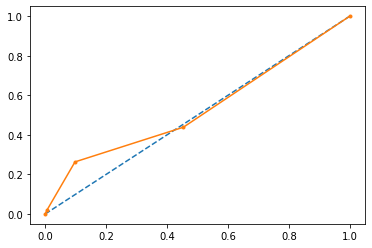

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# fit a model
knn_clf.fit(X_trainval,y_trainval)
# predict probabilities
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=0.119 auc=0.333 ap=0.346


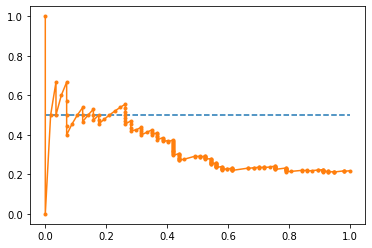

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = knn_bag_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = knn_bag_clf.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## PASTING - SVC LINEAR KERNEL

In [0]:
## svc linear kernel

from sklearn import svm
from sklearn.svm import SVC

In [0]:
svc_clf = SVC(C=1.0, gamma='auto')
n_estimators_vals = [10, 20]
max_samples_vals = [10, 20]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

svc_bag = BaggingClassifier(svc_clf,bootstrap = False, random_state=0)

grid_search = GridSearchCV(svc_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=2, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'max_samples': 10, 'n_estimators': 10}
Best cross-validation score: 0.78


In [0]:
from sklearn.ensemble import BaggingClassifier


svc_clf = SVC(C=1.0, gamma='auto')
svc_bag_clf = BaggingClassifier(svc_clf, n_estimators=100, max_samples=200, bootstrap= False, random_state=0)

svc_bag_clf.fit(X_train, y_train)
y_pred = svc_bag_clf.predict(X_test)

In [0]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from  sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

from  sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.7824427480916031
0.0
0.0


In [0]:
svc_bag_clf.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(svc_bag_clf.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(svc_bag_clf.score(X_test, y_test)))

Train score: 0.78
Test score: 0.78


In [0]:
svc_tr_pred = svc_bag_clf.predict(X_trainval)
svc_test_pred = svc_bag_clf.predict(X_test)

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_tr_pred))
print("precision: ", precision_score(y_trainval, svc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_test_pred))
print("f1 score: ", f1_score(y_test, svc_test_pred))
print("recall score: ", recall_score(y_test, svc_test_pred))
print("precision: ", precision_score(y_test, svc_test_pred))

Train data
Accuracy score:  0.7824427480916031
f1 score:  0.0
recall score:  0.0
precision:  0.0
   
Test data
Accuracy score:  0.7824427480916031
f1 score:  0.0
recall score:  0.0
precision:  0.0


f1=0.000 auc=0.609 ap=0.218


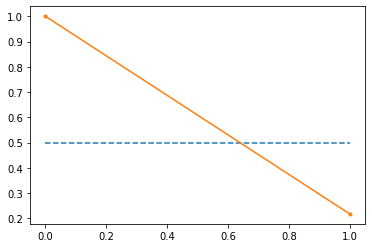

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = svc_bag_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = svc_bag_clf.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## PASTING - SVC KERNEL RBF

In [0]:
## kernel rbf
svc_rbf_clf = SVC(kernel='rbf',C=1.0, gamma=0.5)
n_estimators_vals = [10, 20]
max_samples_vals = [10, 20]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

svc_bag_clf = BaggingClassifier(svc_rbf_clf,bootstrap = False, random_state=0)

grid_search = GridSearchCV(svc_bag_clf , param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=2, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'max_samples': 10, 'n_estimators': 10}
Best cross-validation score: 0.78


In [0]:
from sklearn.ensemble import BaggingClassifier


svc_rbf_clf = SVC(kernel='rbf',C=1.0, gamma=0.5)
svc_bag_clf = BaggingClassifier(svc_rbf_clf, n_estimators=100, max_samples=50, bootstrap= False, random_state=0)

svc_bag_clf.fit(X_train, y_train)
y_pred = svc_bag_clf.predict(X_test)

In [0]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from  sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

from  sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.7824427480916031
0.0
0.0


In [0]:
svc_bag_clf.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(svc_bag_clf.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(svc_bag_clf.score(X_test, y_test)))

Train score: 0.78
Test score: 0.78


In [0]:
svc_tr_pred = svc_bag_clf.predict(X_trainval)
svc_test_pred = svc_bag_clf.predict(X_test)

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_tr_pred))
print("precision: ", precision_score(y_trainval, svc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_test_pred))
print("f1 score: ", f1_score(y_test, svc_test_pred))
print("recall score: ", recall_score(y_test, svc_test_pred))
print("precision: ", precision_score(y_test, svc_test_pred))

Train data
Accuracy score:  0.7824427480916031
f1 score:  0.0
recall score:  0.0
precision:  0.0
   
Test data
Accuracy score:  0.7824427480916031
f1 score:  0.0
recall score:  0.0
precision:  0.0


f1=0.000 auc=0.609 ap=0.218


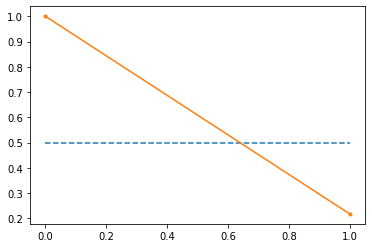

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = svc_bag_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = svc_bag_clf.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## ADABOOST CLASSIFIER - LINEAR SVC

In [0]:
from sklearn.ensemble import AdaBoostClassifier

n_neighbors= [1,3,5,7,9]

param_grid = dict(n_neighbors=n_neighbors)
knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid = dict(n_neighbors=n_neighbors), cv=2, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.76


In [0]:
from sklearn.svm import LinearSVC
ada_clf = AdaBoostClassifier(LinearSVC(C=1), n_estimators=100, algorithm="SAMME", learning_rate=0.01, random_state=0)
ada_clf.fit(X_trainval, y_trainval)


clf_tr_pred = ada_clf.predict(X_trainval)
clf_test_pred = ada_clf.predict(X_test)

In [0]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, clf_tr_pred))
print("f1 score: ", f1_score(y_trainval, clf_tr_pred))
print("recall score: ", recall_score(y_trainval, clf_tr_pred))
print("precision: ", precision_score(y_trainval, clf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, clf_test_pred))
print("f1 score: ", f1_score(y_test, clf_test_pred))
print("recall score: ", recall_score(y_test, clf_test_pred))
print("precision: ", precision_score(y_test, clf_test_pred))

Train data
Accuracy score:  0.77735368956743
f1 score:  0.03314917127071823
recall score:  0.017543859649122806
precision:  0.3
   
Test data
Accuracy score:  0.7824427480916031
f1 score:  0.09523809523809525
recall score:  0.05263157894736842
precision:  0.5


In [0]:
pd.crosstab(y_trainval, clf_tr_pred)

col_0,0,1
default payment next month,,
0,608,7
1,168,3


In [0]:
pd.crosstab(y_test, clf_test_pred)

col_0,0,1
default payment next month,,
0,202,3
1,54,3


In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_test, clf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       205
           1       0.50      0.05      0.10        57

    accuracy                           0.78       262
   macro avg       0.64      0.52      0.49       262
weighted avg       0.73      0.78      0.71       262



## ADABOOST SVC KERNEL POLY

In [0]:
## svc poly

poly_clf = SVC(kernel='poly',C=1.0, degree=1)

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

poly_clf = SVC(kernel='poly',C=1.0, degree=1)

n_estimators_vals = [2, 4]
learning_rate_vals = [0.1, 1]


param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals)
poly_clf_ada = AdaBoostClassifier(poly_clf, algorithm="SAMME",random_state=0)
grid_search = GridSearchCV(poly_clf_ada , param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals), cv=2, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 2}
Best cross-validation score: 0.77


In [0]:

poly_clf = SVC(kernel='poly',C=1.0, degree=1)
poly_ada_clf = AdaBoostClassifier(poly_clf, n_estimators=10, algorithm="SAMME", learning_rate=0.5, random_state=0)
poly_ada_clf.fit(X_trainval, y_trainval)


clf_tr_pred = poly_ada_clf.predict(X_trainval)
clf_test_pred = poly_ada_clf.predict(X_test)

In [0]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, clf_tr_pred))
print("f1 score: ", f1_score(y_trainval, clf_tr_pred))
print("recall score: ", recall_score(y_trainval, clf_tr_pred))
print("precision: ", precision_score(y_trainval, clf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, clf_test_pred))
print("f1 score: ", f1_score(y_test, clf_test_pred))
print("recall score: ", recall_score(y_test, clf_test_pred))
print("precision: ", precision_score(y_test, clf_test_pred))

Train data
Accuracy score:  0.787531806615776
f1 score:  0.2832618025751073
recall score:  0.19298245614035087
precision:  0.532258064516129
   
Test data
Accuracy score:  0.7977099236641222
f1 score:  0.25352112676056343
recall score:  0.15789473684210525
precision:  0.6428571428571429


## GRADIENT BOOSTING - DECISION TREE

In [0]:
## decision tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_trainval, y_trainval)
dt_pred = dt_clf.predict(X_trainval)
dt_test_pred = dt_clf.predict(X_test)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt.fit(X_trainval, y_trainval)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.978
Accuracy on test set: 0.832


In [0]:
gbrt.fit(X_trainval, y_trainval)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
gbrt_tr_pred = gbrt.predict(X_trainval)
gbrt_test_pred = gbrt.predict(X_test)

In [0]:

gbrt_tr_pred = gbrt.predict(X_trainval)
gbrt_test_pred= gbrt.predict(X_test)

In [0]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, dt_pred))
print("f1 score: ", f1_score(y_trainval, dt_pred))
print("recall score: ", recall_score(y_trainval, dt_pred))
print("precision: ", precision_score(y_trainval, dt_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, dt_test_pred))
print("f1 score: ", f1_score(y_test, dt_test_pred))
print("recall score: ", recall_score(y_test, dt_test_pred))
print("precision: ", precision_score(y_test, dt_test_pred))

Train data
Accuracy score:  0.8638676844783715
f1 score:  0.627177700348432
recall score:  0.5263157894736842
precision:  0.7758620689655172
   
Test data
Accuracy score:  0.8244274809160306
f1 score:  0.5106382978723405
recall score:  0.42105263157894735
precision:  0.6486486486486487


## PCA-DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
param_grid = dict(max_depth=[4,6,8,10])

gs_dt = GridSearchCV(dt, param_grid=param_grid, cv=10, scoring='accuracy')
gs_dt.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [4, 6, 8, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [0]:
gs_dt.best_score_

0.7989821882951654

In [0]:
gs_dt.best_params_

{'max_depth': 4}

In [0]:
dt_best = DecisionTreeClassifier(max_depth=4)
dt_best.fit(X_trainval, y_trainval)
dt_pred = dt_best.predict(X_trainval)
dt_test_pred = dt_best.predict(X_test)

In [0]:
from sklearn.metrics import f1_score
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, dt_pred))
print("f1 score: ", f1_score(y_trainval, dt_pred))
print("recall score: ", recall_score(y_trainval, dt_pred))
print("precision: ", precision_score(y_trainval, dt_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, dt_test_pred))
print("f1 score: ", f1_score(y_test, dt_test_pred))
print("recall score: ", recall_score(y_test, dt_test_pred))
print("precision: ", precision_score(y_test, dt_test_pred))

Train data
Accuracy score:  0.8638676844783715
f1 score:  0.627177700348432
recall score:  0.5263157894736842
precision:  0.7758620689655172
   
Test data
Accuracy score:  0.8320610687022901
f1 score:  0.5416666666666666
recall score:  0.45614035087719296
precision:  0.6666666666666666


In [0]:
pd.crosstab(y_trainval, dt_pred)

col_0,0,1
default payment next month,,
0,589,26
1,81,90


In [0]:
pd.crosstab(y_test, dt_test_pred)

col_0,0,1
default payment next month,,
0,192,13
1,31,26


In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_test, dt_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       205
           1       0.67      0.46      0.54        57

    accuracy                           0.83       262
   macro avg       0.76      0.70      0.72       262
weighted avg       0.82      0.83      0.82       262



AUC: 0.750
[2.         1.         0.88888889 0.83823529 0.64705882 0.55555556
 0.36363636 0.26760563 0.25       0.18085106 0.07322654 0.05
 0.        ]


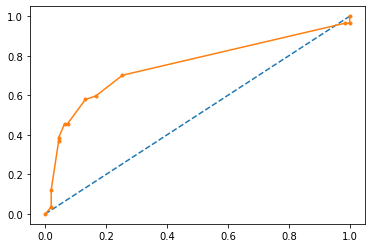

In [0]:
### ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = dt_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=0.542 auc=0.515 ap=0.485


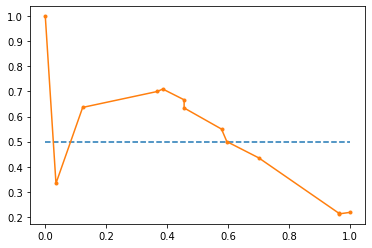

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = dt_best.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
y_prd_class_val = dt_best.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, y_prd_class_val)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## Deep Neural Network

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD

In [0]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 23, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
opt = SGD(lr=0.01, momentum=0.9)
model1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

#step 3: train the model - fit
model1.fit(X_trainval, y_trainval, epochs = 10, batch_size = 400)

Train on 786 samples
Epoch 1/10
786/786 [==============================] - 1s 1ms/sample - loss: 3352.6065 - acc: 0.6832
Epoch 2/10
786/786 [==============================] - 0s 10us/sample - loss: 3186.5223 - acc: 0.6692
Epoch 3/10
786/786 [==============================] - 0s 10us/sample - loss: 3001.6523 - acc: 0.6616
Epoch 4/10
786/786 [==============================] - 0s 10us/sample - loss: 2865.4948 - acc: 0.6489
Epoch 5/10
786/786 [==============================] - 0s 9us/sample - loss: 2709.1250 - acc: 0.6438
Epoch 6/10
786/786 [==============================] - 0s 12us/sample - loss: 2583.9498 - acc: 0.6438
Epoch 7/10
786/786 [==============================] - 0s 12us/sample - loss: 2489.9195 - acc: 0.6501
Epoch 8/10
786/786 [==============================] - 0s 10us/sample - loss: 2389.6985 - acc: 0.6578
Epoch 9/10
786/786 [==============================] - 0s 11us/sample - loss: 2281.0323 - acc: 0.6514
Epoch 10/10
786/786 [==============================] - 0s 10us/sample - 

## PCA

In [0]:
## PCA
from sklearn.decomposition import PCA



pca = PCA().fit(X)

In [0]:
# split data into train+validation set and test set
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 589   size of validation set: 197   size of test set: 262



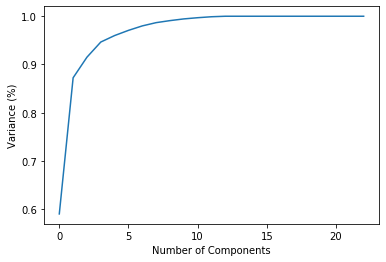

In [0]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.show()

In [0]:
pca = PCA(n_components=10)

X_trainval = pca.fit_transform(X_trainval)
X_test = pca.transform(X_test)

In [0]:
print(X_trainval.shape)
print(X_test.shape)


(786, 10)
(262, 10)


In [0]:
pca.explained_variance_

array([2.90243250e+10, 1.36772961e+10, 2.57069769e+09, 1.37374578e+09,
       7.44412036e+08, 5.79040936e+08, 4.94814838e+08, 2.95086348e+08,
       2.09766441e+08, 1.65771971e+08])

In [0]:
pca.n_components_

10

In [0]:
pca.explained_variance_ratio_

array([0.58757656, 0.27688701, 0.05204192, 0.02781049, 0.01507009,
       0.01172227, 0.01001717, 0.00597381, 0.00424657, 0.00335593])

In [0]:
np.sum(pca.explained_variance_ratio_)

0.9947018252017991

## K-NN AFTER PCA

In [0]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_trainval, y_trainval)
    train_score_array.append(knn.score(X_trainval, y_trainval))
    test_score_array.append(knn.score(X_test, y_test))

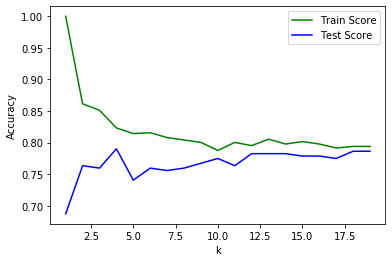

In [0]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier()


#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])
k_range = [1,3,5,7,9,12,15,17,20]          
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights = weights_range)


#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 17, 'weights': 'distance'}
Best cross-validation score: 0.78


In [0]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []


knn = KNeighborsClassifier(3)
knn.fit(X_trainval, y_trainval)
train_score_array.append(knn.score(X_trainval, y_trainval))
test_score_array.append(knn.score(X_test, y_test))

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

In [0]:
knn_c_bst_clf = KNeighborsClassifier(n_neighbors=1)

knn_c_bst_clf.fit(X_trainval,y_trainval)

knnc_tr_pred = knn_c_bst_clf.predict(X_trainval)
knnc_test_pred = knn_c_bst_clf.predict(X_test)
print(knnc_tr_pred[4])

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, knnc_tr_pred))
print("f1 score: ", f1_score(y_trainval, knnc_tr_pred))
print("recall score: ", recall_score(y_trainval, knnc_tr_pred))
print("precision: ", precision_score(y_trainval, knnc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, knnc_test_pred))
print("f1 score: ", f1_score(y_test, knnc_test_pred))
print("recall score: ", recall_score(y_test, knnc_test_pred))
print("precision: ", precision_score(y_test, knnc_test_pred))

0
Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  0.6870229007633588
f1 score:  0.24074074074074073
recall score:  0.22807017543859648
precision:  0.2549019607843137


In [0]:
pd.crosstab(y_trainval, knnc_tr_pred)

col_0,0,1
default payment next month,,
0,615,0
1,0,171


In [0]:
pd.crosstab(y_test, knnc_test_pred)

col_0,0,1
default payment next month,,
0,167,38
1,44,13


In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_test, knnc_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       205
           1       0.25      0.23      0.24        57

    accuracy                           0.69       262
   macro avg       0.52      0.52      0.52       262
weighted avg       0.67      0.69      0.68       262



AUC: 0.521
[2. 1. 0.]


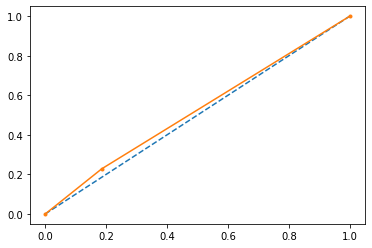

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# fit a model
knn_c_bst_clf.fit(X_trainval,y_trainval)
# predict probabilities
probs = knn_c_bst_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=0.241 auc=0.325 ap=0.226


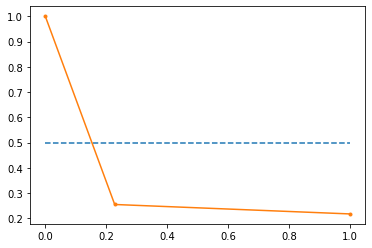

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = knn_c_bst_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = knn_c_bst_clf.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_trainval, y_trainval)
    log_l2.fit(X_trainval, y_trainval)
    train_score_l1.append(log_l1.score(X_trainval, y_trainval))
    train_score_l2.append(log_l2.score(X_trainval, y_trainval))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

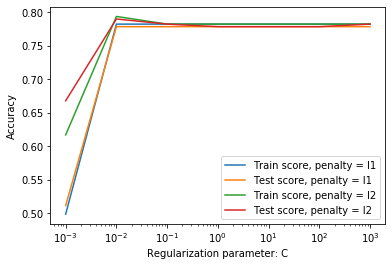

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [0]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty_mod = ['l1','l2']

log_reg = LogisticRegression()

#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(penalty=penalty_mod,C=c_range)
print(param_grid)

#instantiation of the grid
log_reg_grid = GridSearchCV(log_reg,param_grid, cv=10, scoring='accuracy')

# fitting the grid
log_reg_grid.fit(X, y)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
scores = cross_val_score(log_reg, X, y,cv=10) # input arguments followed by X and Y
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.77142857 0.78095238 0.78095238 0.78095238 0.78095238 0.78095238
 0.78095238 0.78095238 0.78846154 0.78846154]


In [0]:
log_reg = LogisticRegression(penalty = 'l2', C = 1)
log_reg.fit(X_trainval, y_trainval)

print(log_reg.score(X_trainval, y_trainval))
print(log_reg.score(X_test, y_test))


logreg_tr_pred = log_reg.predict(X_trainval)
logreg_test_pred = log_reg.predict(X_test)

0.7824427480916031
0.7786259541984732


In [0]:
pd.crosstab(y_trainval, logreg_tr_pred)

col_0,0
default payment next month,
0,615
1,171


In [0]:
print(log_reg.score(X_trainval, y_trainval))

0.7824427480916031


In [0]:
pd.crosstab(y_test, logreg_test_pred)

col_0,0,1
default payment next month,,
0,204,1
1,57,0


In [0]:
print(log_reg.score(X_test, y_test))

0.7786259541984732


In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_test, logreg_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       205
           1       0.00      0.00      0.00        57

    accuracy                           0.78       262
   macro avg       0.39      0.50      0.44       262
weighted avg       0.61      0.78      0.69       262



In [0]:
from sklearn.metrics import accuracy_score

print("Accuracy score: ", accuracy_score(y_trainval, logreg_tr_pred))
print("f1 score: ", f1_score(y_trainval, logreg_tr_pred))
print("recall score: ", recall_score(y_trainval, logreg_tr_pred))
print("precision: ", precision_score(y_trainval, logreg_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, logreg_test_pred))
print("f1 score: ", f1_score(y_test, logreg_test_pred))
print("recall score: ", recall_score(y_test, logreg_test_pred))
print("precision: ", precision_score(y_test, logreg_test_pred))

Accuracy score:  0.7824427480916031
f1 score:  0.0
recall score:  0.0
precision:  0.0
   
Test data
Accuracy score:  0.7786259541984732
f1 score:  0.0
recall score:  0.0
precision:  0.0


AUC: 0.703
[1.50272704e+00 5.02727037e-01 3.87287634e-01 3.69712825e-01
 3.65056944e-01 3.57796140e-01 3.57131462e-01 3.49572262e-01
 3.47538881e-01 3.46991173e-01 3.45599035e-01 3.44271262e-01
 3.40037963e-01 3.33867205e-01 3.33020896e-01 3.26457442e-01
 3.25374965e-01 3.25187691e-01 3.22066058e-01 3.21750415e-01
 3.20249034e-01 3.20181731e-01 3.15442003e-01 3.13760764e-01
 3.11115226e-01 3.10626584e-01 2.99016285e-01 2.97807942e-01
 2.92566620e-01 2.91869744e-01 2.84143927e-01 2.84132511e-01
 2.78168995e-01 2.76787581e-01 2.76458521e-01 2.75431409e-01
 2.74482394e-01 2.74396187e-01 2.72720480e-01 2.72114298e-01
 2.71587283e-01 2.71426193e-01 2.40536952e-01 2.40513838e-01
 2.31643653e-01 2.31056221e-01 2.16577042e-01 2.15969936e-01
 2.13137617e-01 2.12929070e-01 2.11845523e-01 2.10437244e-01
 2.02735261e-01 2.02439260e-01 1.93770025e-01 1.93738274e-01
 1.85916092e-01 1.84839064e-01 1.71145996e-01 1.68289858e-01
 1.64143534e-01 1.63013743e-01 1.52985655e-01 1.52161724e-01
 1.30769181e-

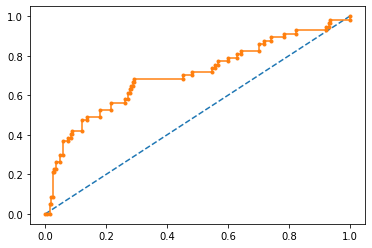

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=0.000 auc=0.432 ap=0.442


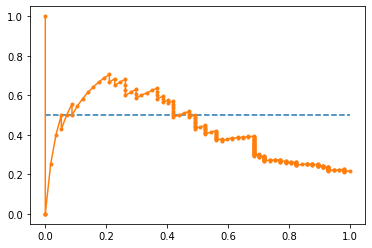

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = log_reg.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
y_prd_class_val = log_reg.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, y_prd_class_val)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## Linear SVC

In [0]:
from sklearn.svm import LinearSVC
c_range= [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=c_range)
print("Parameter grid:\n{}".format(param_grid))

clf = LinearSVC()
linearsvc_grid_search = GridSearchCV(estimator=clf, param_grid = dict(C=c_range)   ,n_jobs=-1)
linearsvc_grid_search.fit(X, y)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
linearsvc_grid_search.best_params_

{'C': 10}

In [0]:
clf_best = LinearSVC(C=1)

In [0]:
clf_best.fit(X_trainval, y_trainval)

clf_tr_pred = clf_best.predict(X_trainval)
clf_test_pred = clf_best.predict(X_test)

In [0]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, clf_tr_pred))
print("f1 score: ", f1_score(y_trainval, clf_tr_pred))
print("recall score: ", recall_score(y_trainval, clf_tr_pred))
print("precision: ", precision_score(y_trainval, clf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, clf_test_pred))
print("f1 score: ", f1_score(y_test, clf_test_pred))
print("recall score: ", recall_score(y_test, clf_test_pred))
print("precision: ", precision_score(y_test, clf_test_pred))

Train data
Accuracy score:  0.4860050890585242
f1 score:  0.39520958083832336
recall score:  0.7719298245614035
precision:  0.2655935613682093
   
Test data
Accuracy score:  0.5419847328244275
f1 score:  0.393939393939394
recall score:  0.6842105263157895
precision:  0.2765957446808511


In [0]:
pd.crosstab(y_trainval, clf_tr_pred)

col_0,0,1
default payment next month,,
0,250,365
1,39,132


In [0]:
pd.crosstab(y_test, clf_test_pred)

col_0,0,1
default payment next month,,
0,103,102
1,18,39


In [0]:
report = classification_report(y_test, clf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.50      0.63       205
           1       0.28      0.68      0.39        57

    accuracy                           0.54       262
   macro avg       0.56      0.59      0.51       262
weighted avg       0.73      0.54      0.58       262



## SVC LINEAR KERNEL

In [0]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.005]

param_grid = dict(C=c_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.005]}


In [0]:
svc = SVC(kernel='linear')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range) ,n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
grid_search.best_score_

0.7767175572519084

In [0]:
grid_search.best_params_

{'C': 0.001}

In [0]:
svc_best = SVC(C=10, gamma='auto',probability=True)

In [0]:
svc_best.fit(X_trainval, y_trainval)

svc_tr_pred = svc_best.predict(X_trainval)
svc_test_pred = svc_best.predict(X_test)

In [0]:
from sklearn.metrics import f1_score
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_tr_pred))
print("precision: ", precision_score(y_trainval, svc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_test_pred))
print("f1 score: ", f1_score(y_test, svc_test_pred))
print("recall score: ", recall_score(y_test, svc_test_pred))
print("precision: ", precision_score(y_test, svc_test_pred))

Train data
Accuracy score:  0.9987277353689568
f1 score:  0.9970674486803519
recall score:  0.9941520467836257
precision:  1.0
   
Test data
Accuracy score:  0.7824427480916031
f1 score:  0.0
recall score:  0.0
precision:  0.0


In [0]:
pd.crosstab(y_trainval, svc_tr_pred)

col_0,0,1
default payment next month,,
0,615,0
1,1,170


In [0]:
pd.crosstab(y_test, svc_test_pred)

col_0,0
default payment next month,
0,205
1,57


In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_test, svc_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       205
           1       0.00      0.00      0.00        57

    accuracy                           0.78       262
   macro avg       0.39      0.50      0.44       262
weighted avg       0.61      0.78      0.69       262



AUC: 0.491
[1.21247743 0.21247743 0.10960545]


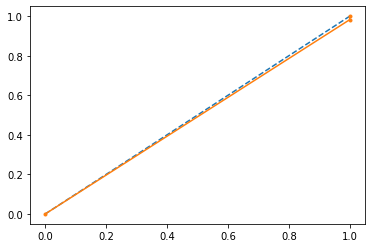

In [0]:
### ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = svc_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## SVC KERNEL RBF

In [0]:
#from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.005]
gamma_range=[0.001, 0.05]

param_grid = dict(C=c_range, gamma=gamma_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.005], 'gamma': [0.001, 0.05]}


In [0]:
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range,gamma=gamma_range) ,n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.005], 'gamma': [0.001, 0.05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
grid_search.best_score_

0.7824427480916031

In [0]:
grid_search.best_params_

{'C': 0.001, 'gamma': 0.001}

In [0]:
svc_best_rbf = SVC(kernel='rbf',C=1.0, gamma=0.5)

In [0]:
svc_best_rbf.fit(X_trainval, y_trainval)

svc_rbf_tr_pred = svc_best_rbf.predict(X_trainval)
svc_rbf_test_pred = svc_best_rbf.predict(X_test)

In [0]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_rbf_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_rbf_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_rbf_tr_pred))
print("precision: ", precision_score(y_trainval, svc_rbf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_rbf_test_pred))
print("f1 score: ", f1_score(y_test, svc_rbf_test_pred))
print("recall score: ", recall_score(y_test, svc_rbf_test_pred))
print("precision: ", precision_score(y_test, svc_rbf_test_pred))

Train data
Accuracy score:  0.9987277353689568
f1 score:  0.9970674486803519
recall score:  0.9941520467836257
precision:  1.0
   
Test data
Accuracy score:  0.7824427480916031
f1 score:  0.0
recall score:  0.0
precision:  0.0


In [0]:
pd.crosstab(y_trainval, svc_rbf_tr_pred)

col_0,0,1
default payment next month,,
0,615,0
1,1,170


In [0]:
pd.crosstab(y_test, svc_rbf_test_pred)

col_0,0
default payment next month,
0,205
1,57


In [0]:
report = classification_report(y_test, svc_rbf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       205
           1       0.00      0.00      0.00        57

    accuracy                           0.78       262
   macro avg       0.39      0.50      0.44       262
weighted avg       0.61      0.78      0.69       262



## SVC KERNEL POLY

In [25]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [1, 5]
degree_range=[1,2]

param_grid = dict(C=c_range, degree = degree_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [1, 5], 'degree': [1, 2]}


In [26]:
svc = SVC(kernel='poly')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range,degree = degree_range) ,n_jobs=-1)
grid_search.fit(X, y)

In [26]:
svc_best_poly = SVC(kernel='poly',C=100, degree=1)

In [29]:
svc_best_poly.fit(X_trainval, y_trainval)

svc_poly_tr_pred = svc_best_poly.predict(X_trainval)
svc_poly_test_pred = svc_best_poly.predict(X_test)

C:\Users\heta2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_poly_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_poly_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_poly_tr_pred))
print("precision: ", precision_score(y_trainval, svc_poly_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_poly_test_pred))
print("f1 score: ", f1_score(y_test, svc_poly_test_pred))
print("recall score: ", recall_score(y_test, svc_poly_test_pred))
print("precision: ", precision_score(y_test, svc_poly_test_pred))

Train data


NameError: name 'accuracy_score' is not defined

In [31]:
pd.crosstab(y_trainval, svc_poly_tr_pred)

col_0,0,1
default payment next month,,
0,586,29
1,143,28


In [32]:
pd.crosstab(y_trainval, svc_poly_tr_pred)

col_0,0,1
default payment next month,,
0,586,29
1,143,28


In [34]:
pd.crosstab(y_test, svc_poly_test_pred)

col_0,0,1
default payment next month,,
0,197,8
1,51,6


In [35]:
report = classification_report(y_test, svc_poly_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       205
           1       0.43      0.11      0.17        57

   micro avg       0.77      0.77      0.77       262
   macro avg       0.61      0.53      0.52       262
weighted avg       0.71      0.77      0.72       262



## Scores of Before and After PCA